In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def get_births_country_year(df, country, start_date, end_date):
    """
    Get the births data for a given country between start_date and end_date.
    """
    df_country = df.loc[(df["geo"] == country) & (df.date >= start_date) & (df.date <= end_date)]

    if len(df_country) == 0:
        print(f"No data found for {country} between {start_date} and {end_date}")
        return pd.DataFrame()

    df_country.rename(columns={"TIME_PERIOD": "year", 
                               "OBS_VALUE": "births", 
                               "geo": "country"}, inplace=True)

    return df_country[["country", "date", "month", "year", "births"]].reset_index(drop=True)

In [2]:
# import list of countries
countries = pd.read_csv("../../../supporting-files/countries.csv")

# import raw eurostat data on births
data = pd.read_csv("./estat_demo_fmonth_filtered_en.csv")
data = data.loc[(data.month != "Total") & (data.geo.isin(countries.country.values))]

# add date column (1st day of the month)
data["date"] = pd.to_datetime(data["TIME_PERIOD"].astype(str) + "-" + data["month"].astype(str) + "-01")
data.head()

,DATAFLOW,LAST UPDATE,freq,unit,month,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS,date
19,ESTAT:DEMO_FMONTH(1.0),15/05/25 23:00:00,Annual,Number,January,Austria,2015,6985,NaN,NaN,2015-01-01
20,ESTAT:DEMO_FMONTH(1.0),15/05/25 23:00:00,Annual,Number,January,Austria,2016,6980,NaN,NaN,2016-01-01
21,ESTAT:DEMO_FMONTH(1.0),15/05/25 23:00:00,Annual,Number,January,Austria,2017,7040,NaN,NaN,2017-01-01
22,ESTAT:DEMO_FMONTH(1.0),15/05/25 23:00:00,Annual,Number,January,Austria,2018,7219,NaN,NaN,2018-01-01
23,ESTAT:DEMO_FMONTH(1.0),15/05/25 23:00:00,Annual,Number,January,Austria,2019,7061,NaN,NaN,2019-01-01


In [3]:
start_date = "2023-09-01"
end_date = "2024-05-01"

df_total = pd.DataFrame()
for country in countries.country.values:
    df_total = pd.concat([df_total, 
                          get_births_country_year(data, country, start_date, end_date).sort_values(by="date")], ignore_index=True)
    
# fix the date to match the scenario period 
df_total["year"] = df_total["year"] + 2
df_total["date"] = pd.to_datetime(df_total["year"].astype(str) + "-" + df_total["month"].astype(str) + "-01")
df_total.head()

,country,date,month,year,births
0,Austria,2025-09-01,September,2025,6463
1,Austria,2025-10-01,October,2025,6674
2,Austria,2025-11-01,November,2025,6347
3,Austria,2025-12-01,December,2025,6179
4,Austria,2026-01-01,January,2026,6403


Austria
Total null values:  0


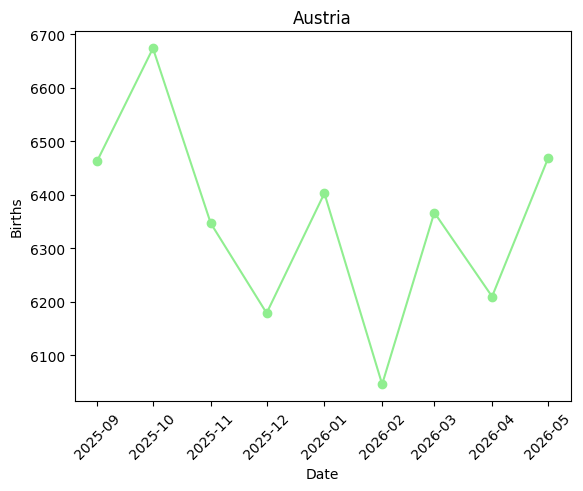

Belgium
Total null values:  0


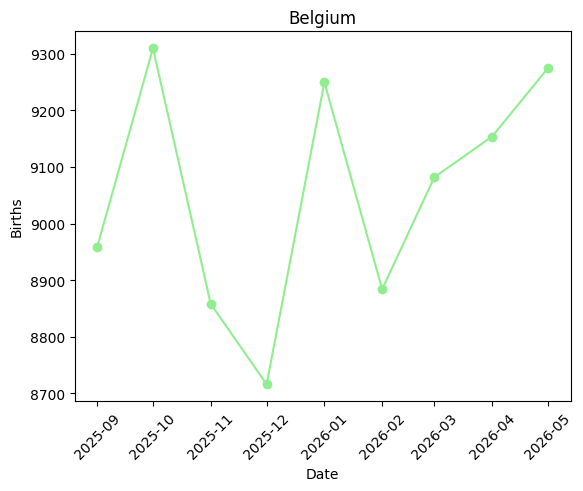

Bulgaria
Total null values:  0


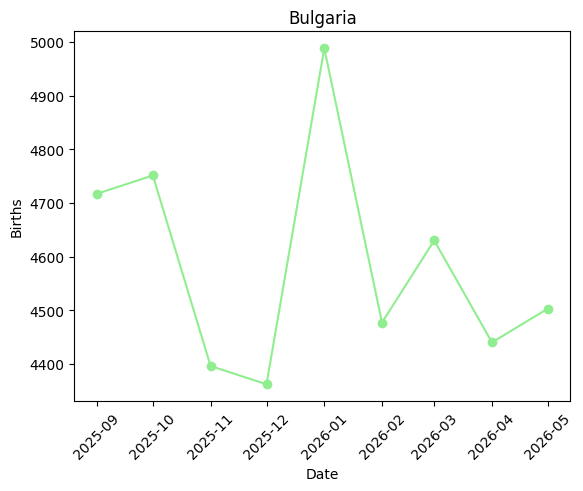

Croatia
Total null values:  0


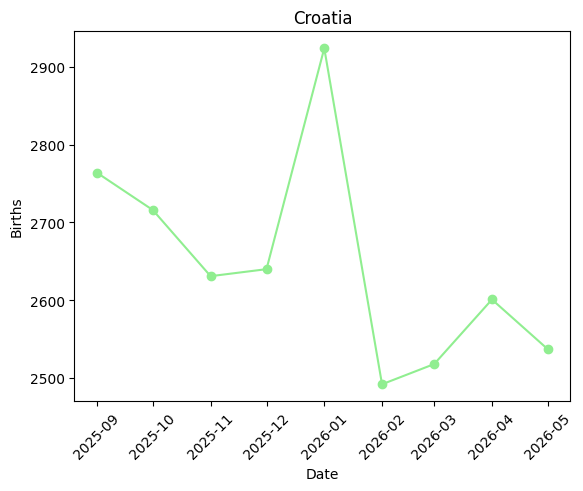

Cyprus
Total null values:  0


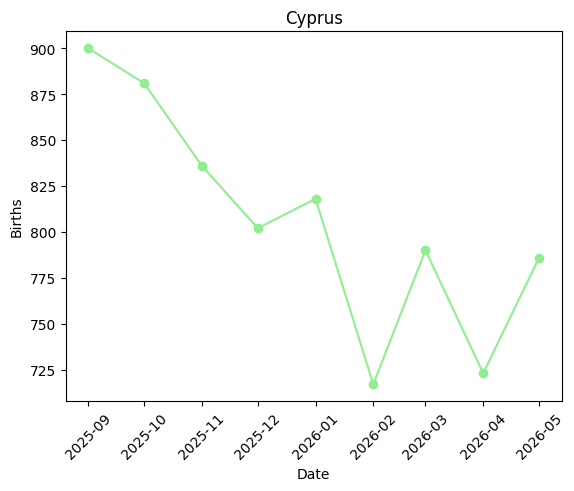

Czechia
Total null values:  0


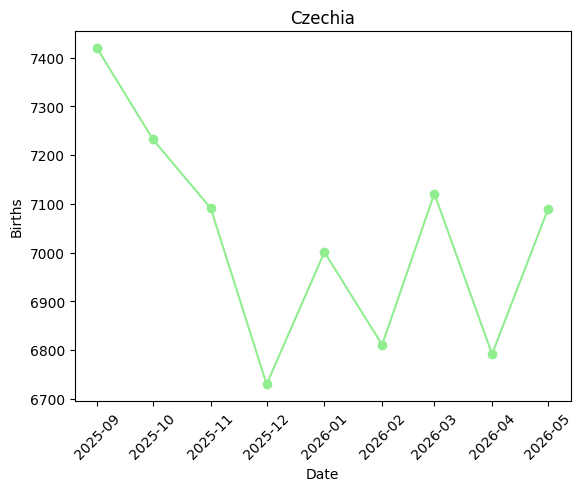

Denmark
Total null values:  0


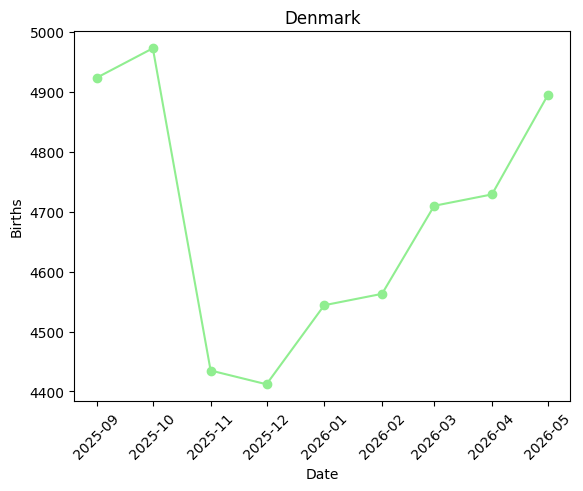

Estonia
Total null values:  0


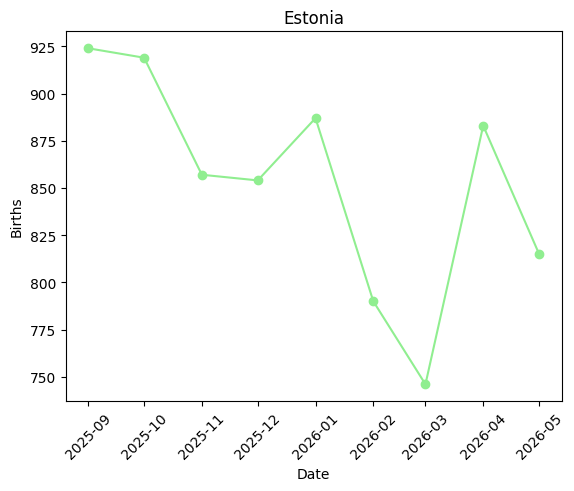

Finland
Total null values:  0


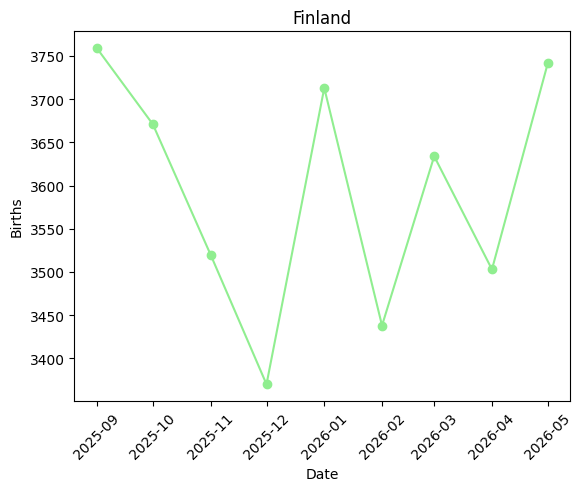

France
Total null values:  0


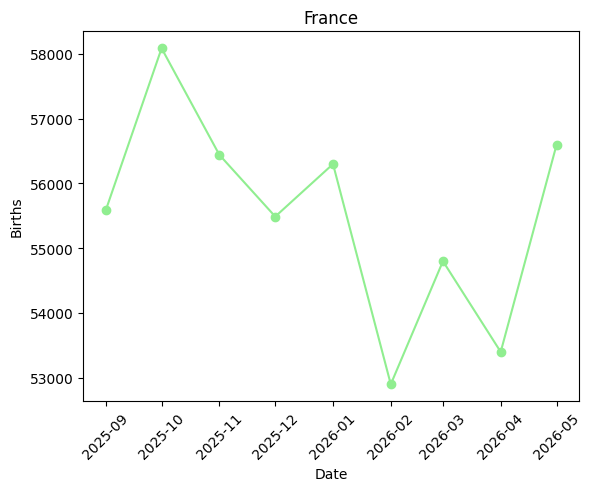

Germany
Total null values:  0


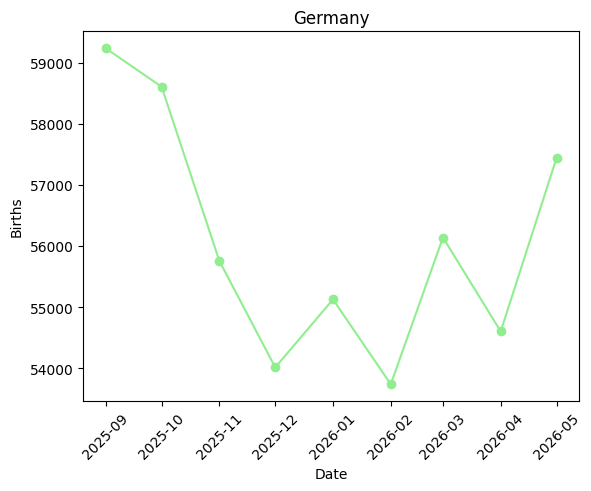

Greece
Total null values:  0


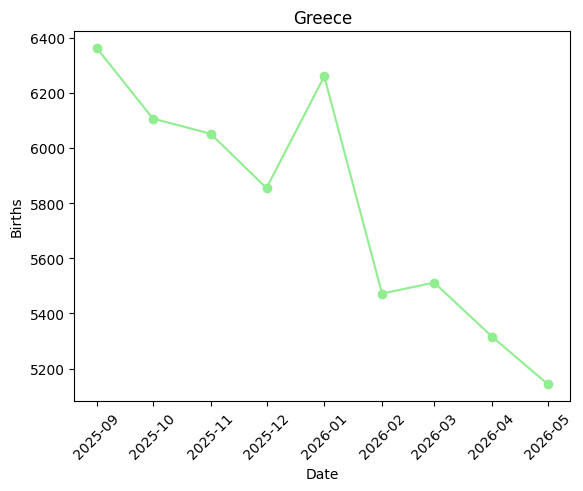

Hungary
Total null values:  0


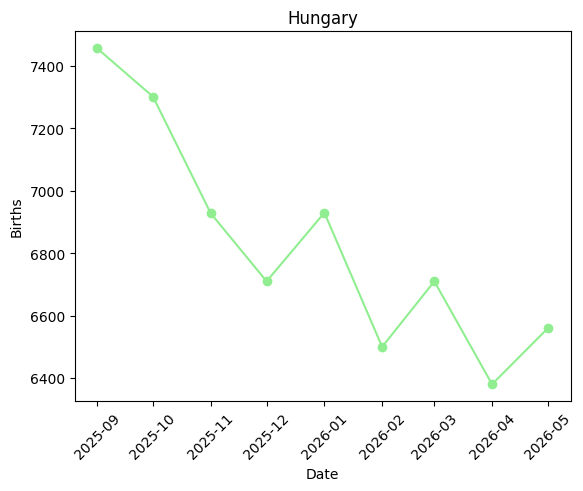

Iceland
Total null values:  0


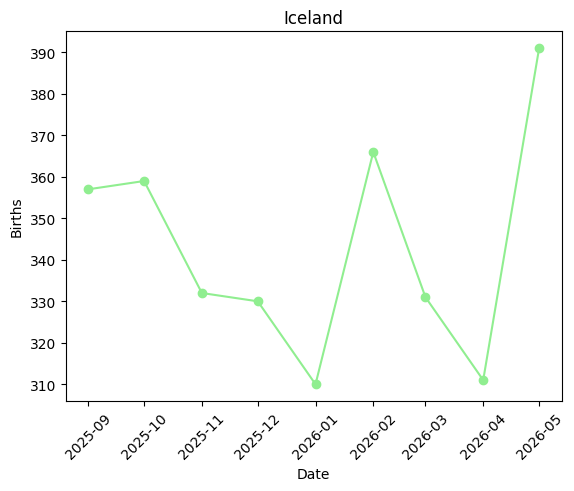

Ireland
Total null values:  0


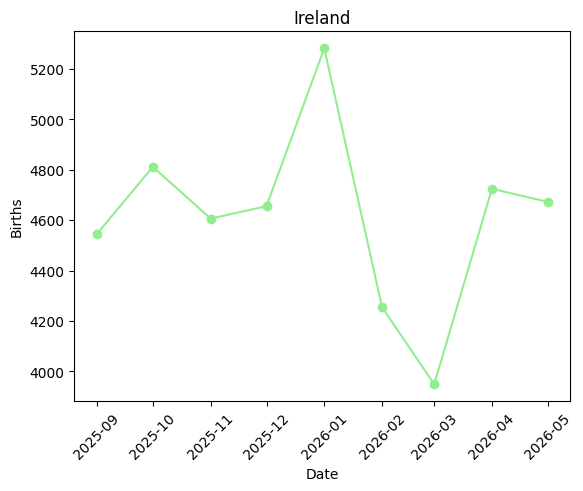

Italy
Total null values:  0


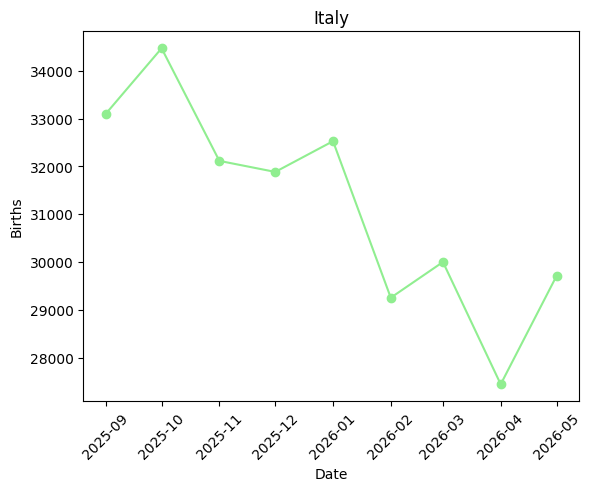

Latvia
Total null values:  0


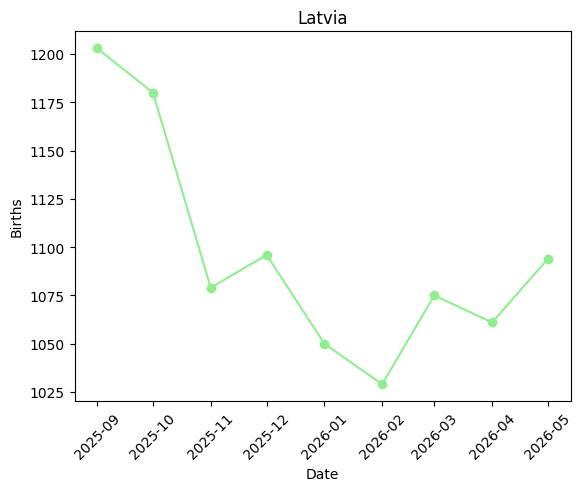

Liechtenstein
Total null values:  0


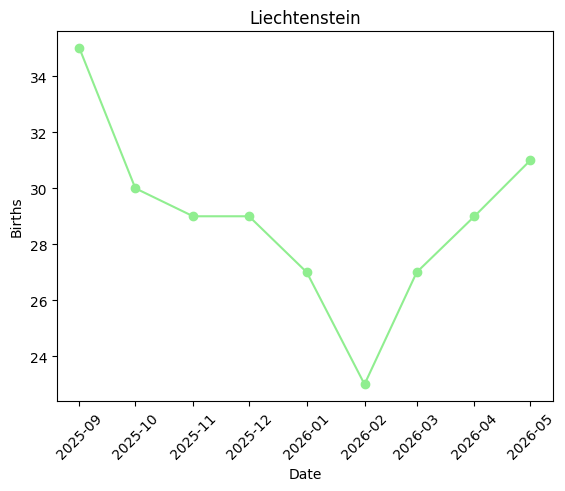

Lithuania
Total null values:  0


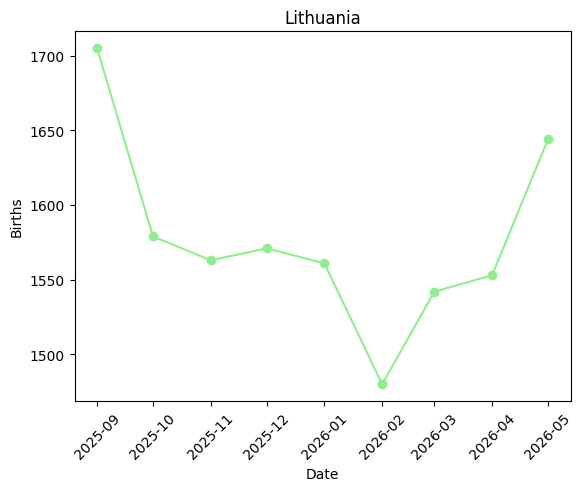

Luxembourg
Total null values:  0


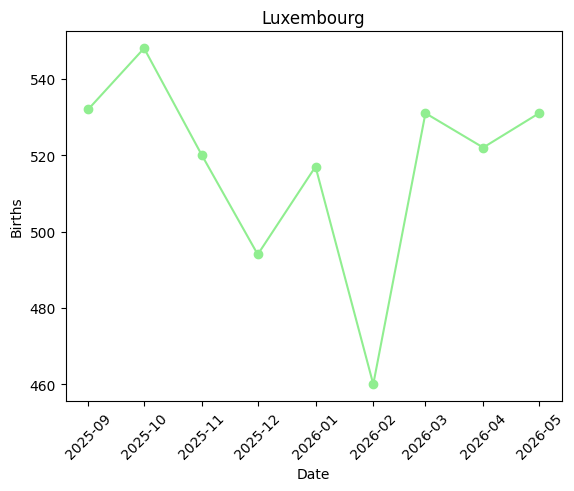

Malta
Total null values:  0


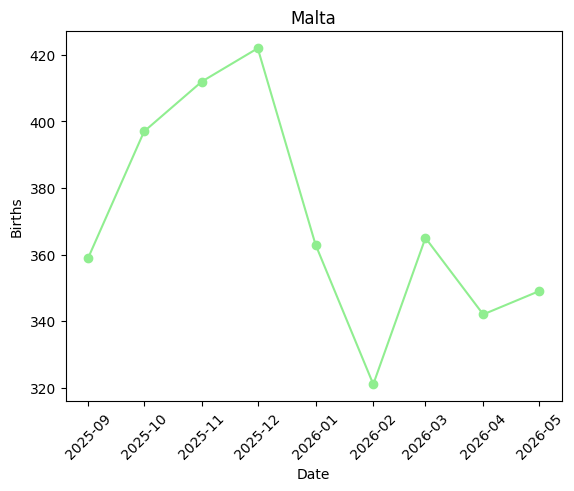

Netherlands
Total null values:  0


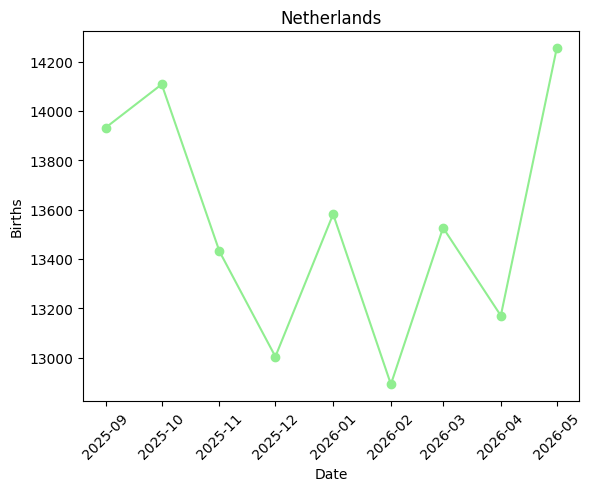

Norway
Total null values:  0


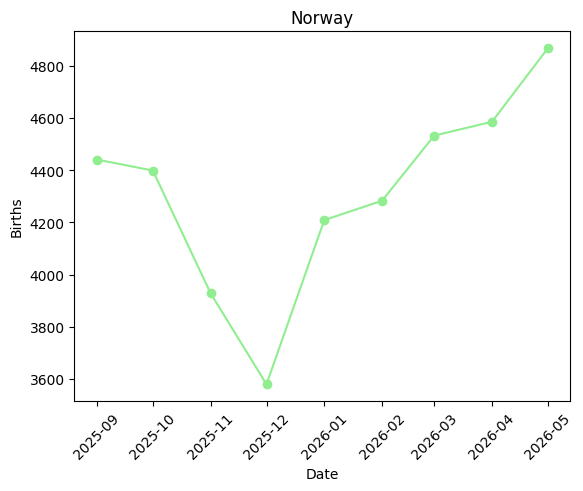

Poland
Total null values:  0


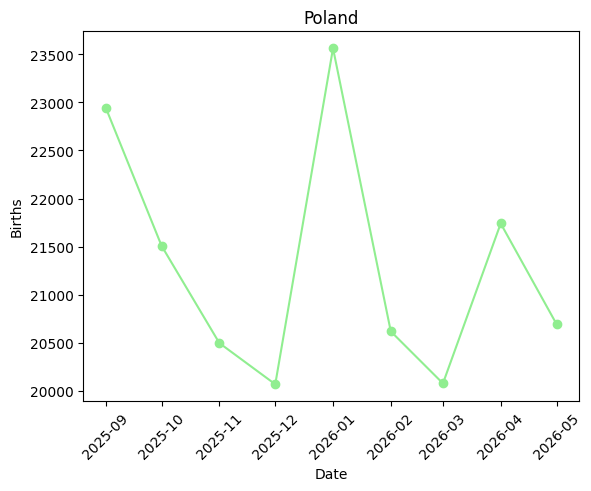

Portugal
Total null values:  0


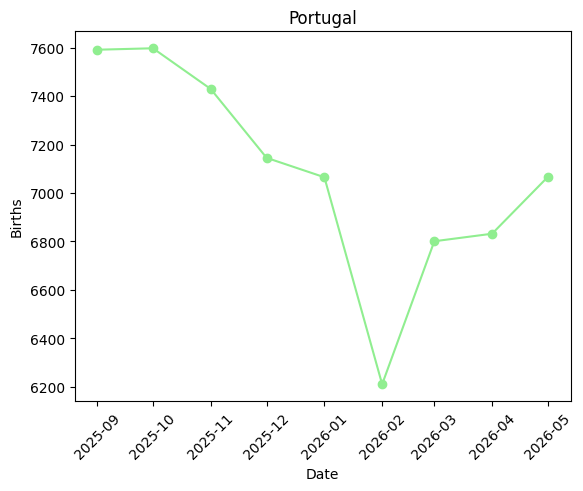

Romania
Total null values:  0


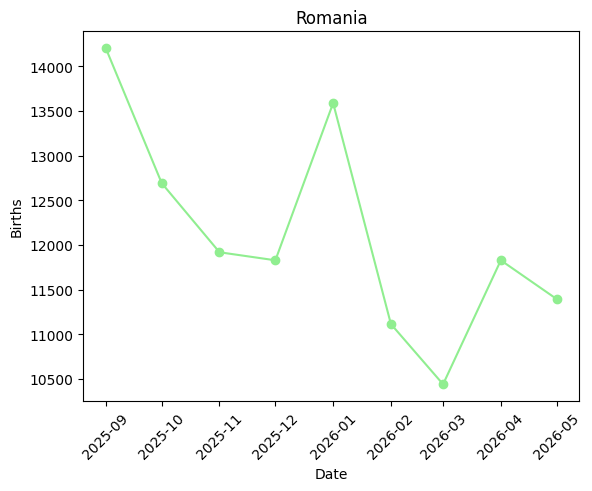

Slovakia
Total null values:  0


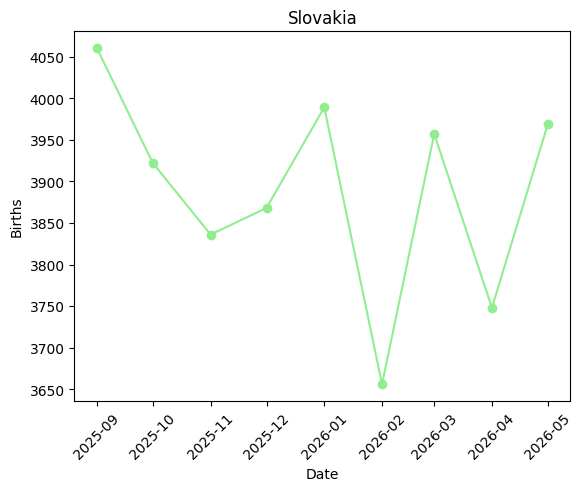

Slovenia
Total null values:  0


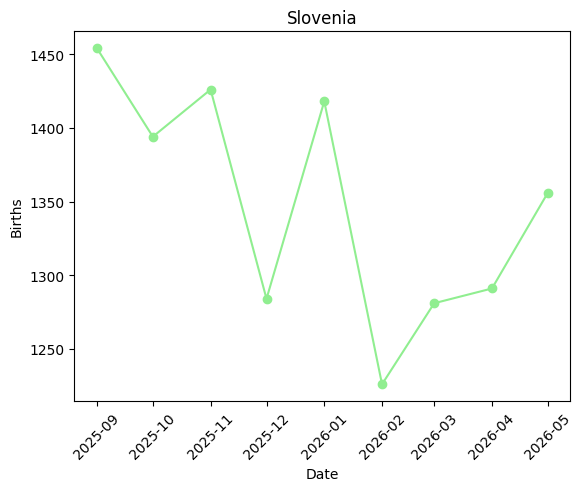

Spain
Total null values:  0


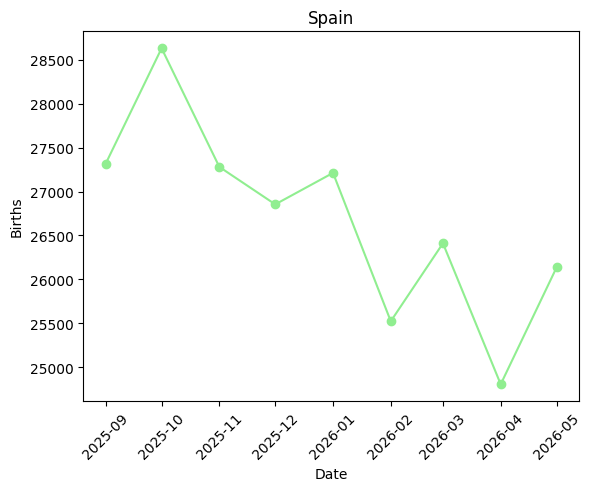

Sweden
Total null values:  0


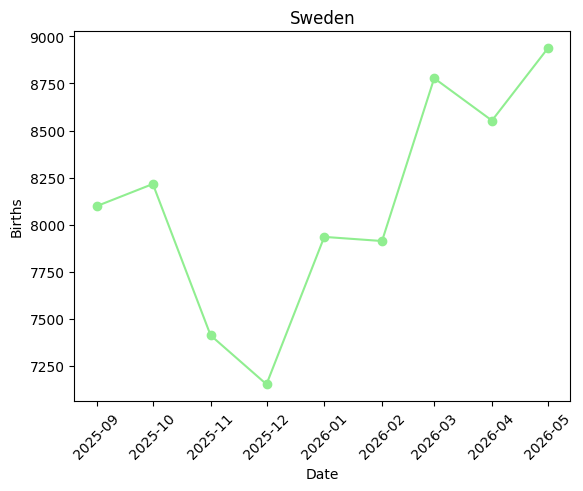

In [4]:
# check for null values
for country in df_total.country.unique():
    print(country)
    df_country = df_total.loc[df_total.country == country]
    null_vals = df_country.loc[df_country.births.isnull()].shape[0]
    print("Total null values: ", null_vals)
    
    if null_vals > 0:
        plt.plot(df_country.date, df_country.births, marker="o", color="red")
    else:
        plt.plot(df_country.date, df_country.births, marker="o", color="lightgreen")
    
    plt.xlabel("Date")
    plt.ylabel("Births")
    plt.title(country)
    plt.xticks(rotation=45)
    plt.show()

In [5]:
# save births data
df_total.to_csv("../births_by_month.csv", index=False)